# 단순선형회귀 아버지와 아들

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [40]:
# 아부지와 아들의 키 

df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


* 아버지와 아들의 키만 발췌

In [8]:
# df.Father[1], 
df.Height[1]

69.2

In [9]:
# 필터링 filtering

df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [10]:
# 셀렉션 Selection - 아버지와 아들 데이터만 선택 
df = df[['Father', 'Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [41]:
df = df[df.Gender == 'M'][['Father', 'Height']]
df.rename(columns={'Height' : 'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [42]:
# inch를 cm으로 
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

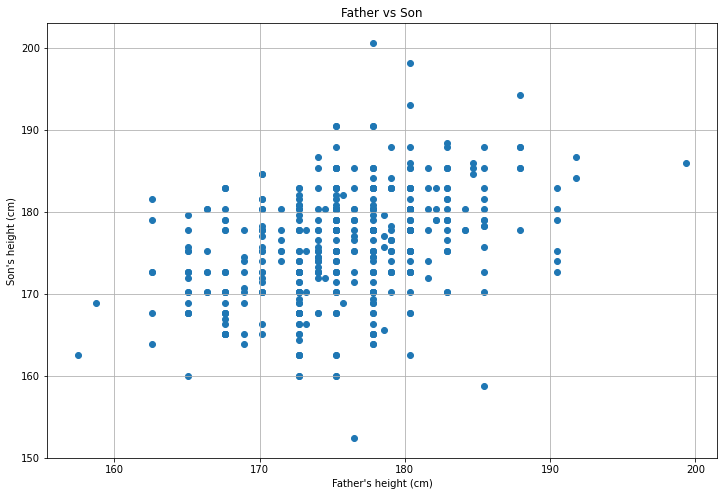

In [43]:
plt.figure(figsize=(12,8))

plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()


* 회귀선구하기 훠궈!

In [44]:
# 회귀선 구할때 넘파이의 최소자승법. 그대신 우리는 np.polyfit (서울시 데이터 실습에서)

weight, bias = np.polyfit(df.Father, df.Son, 1)    # 파라메터 x값, y값 1차식으로 
weight, bias

# np.polyfit(df.인구수, df.CCTV댓수, 1)
# # 일차식으로 어레이 2개의 값 준다. 앞의 값이 coefficient(계수,기울기) , 뒤의값이  intercept ,절편
# # 인공지능에서는 weight , bias 라고 한다.

(0.44774791760302307, 97.17763700739373)

In [45]:
np.polyfit(df.Father, df.Son, 2)    # 파라메터 x값, y값 1차식으로 

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [46]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

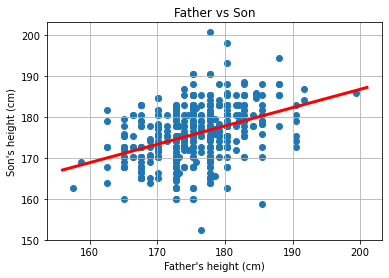

In [47]:
# plt.figure(figsize=(12,8))

plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son')
plt.show()

- Scikit-Learn 으로 회귀식 구하기

In [48]:
from sklearn.linear_model import LinearRegression #로지스틱 리그레션 아니야
# 현재는 전체 데이터를 가지고 회귀식을 구할것.
lr = LinearRegression()

In [51]:
lr.fit(df.Father.values.reshape(-1,1), df.Son.values) #2D 넣어라 삐리비리 1D 와장창 # 우린 싱글피쳐이므로 reshape(-1,1)

LinearRegression()

In [54]:
# 기울기 weight
lr.coef_

array([0.44774792])

In [56]:
# 절편, bias
lr.intercept_

97.17763700739346

In [57]:
weight, bias

(0.44774791760302307, 97.17763700739373)

In [58]:
# 넘파이에서 구한값이 사이킷 런으로 구한 값이랑 동일 

In [ ]:
# 또 한가지 꼭 알아야 할것 # 회귀식이 잘 됐는지 못됐는지 파악하는것 R 스퀘어

# 전체에러 / 잔차에러

# R^2 = SSR / SST :


In [60]:
# 잔차 제곱의 합(RSS : Residual Sum of Square)
lr._residues # 잔여물, 잔기(화학), 잔차

17556.59951549399

In [61]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478306992

In [ ]:
# 회귀선 근처에 몰려있으면, R^2 스코어 높아. 당연하다. SST값 (분모) 작기때문